In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("SP500.csv", index_col='date', parse_dates=['date'])

In [3]:
data.head()

,open,high,low,close,volume,Name,per_change,Sector
date,,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-0.021234,Industrials
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.028878,Industrials
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.012457,Industrials
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.025175,Industrials
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.063588,Industrials


In [4]:
data.isnull().sum()

open          11
high           8
low            8
close          0
volume         0
Name           0
per_change    11
Sector         0
dtype: int64

In [5]:
np.where(pd.isnull(data))

(array([ 82949,  82949,  82949,  82949, 165734, 165734, 165857, 165857,
        165857, 165857, 205076, 205076, 239832, 239832, 239832, 239832,
        434379, 434379, 434502, 434502, 434502, 434502, 478594, 478594,
        478594, 478594, 558213, 558213, 558213, 558213, 581906, 581906,
        581906, 581906, 598236, 598236, 598236, 598236]),
 array([0, 1, 2, 6, 0, 6, 0, 1, 2, 6, 0, 6, 0, 1, 2, 6, 0, 6, 0, 1, 2, 6,
        0, 1, 2, 6, 0, 1, 2, 6, 0, 1, 2, 6, 0, 1, 2, 6]))

In [6]:
data.iloc[165857,:]

open                  NaN
high                  NaN
low                   NaN
close               88.55
volume                  0
Name                  DHR
per_change            NaN
Sector        Health Care
Name: 2016-01-12 00:00:00, dtype: object

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

open          0
high          0
low           0
close         0
volume        0
Name          0
per_change    0
Sector        0
dtype: int64

In [9]:
apple_close = data[data['Name'] == 'AAPL']['close']

In [10]:
apple_close.head()

date
2013-02-08    67.8542
2013-02-11    68.5614
2013-02-12    66.8428
2013-02-13    66.7156
2013-02-14    66.6556
Name: close, dtype: float64

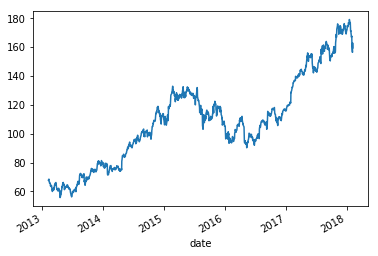

In [11]:
apple_close.plot()

In [12]:
apple_close_20 = apple_close.rolling(window=20).mean()
apple_close_100 = apple_close.rolling(window=100).mean()

Text(0.5,1,'Apple Close Prices')

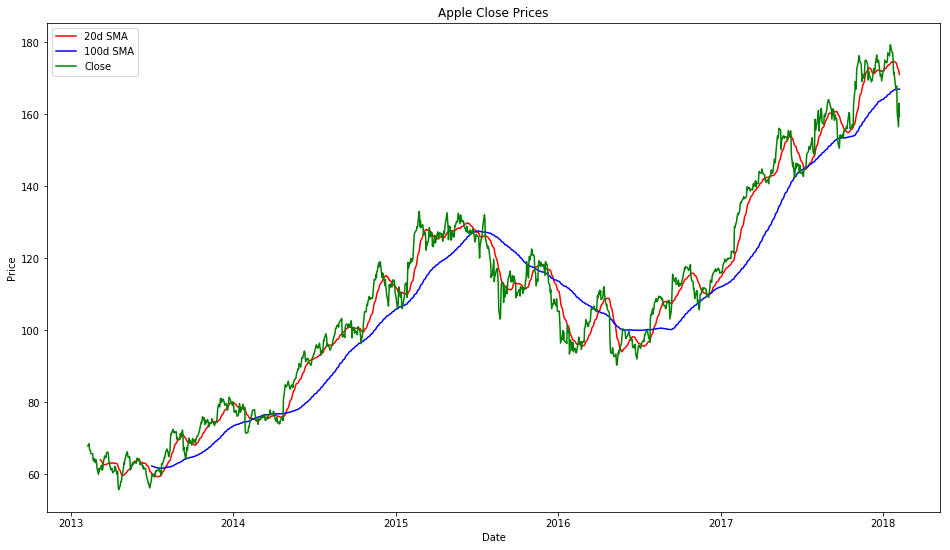

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(apple_close_20.index, apple_close_20, label="20d SMA", color="red")
ax.plot(apple_close_100.index, apple_close_100, label="100d SMA", color="blue")
ax.plot(apple_close.index, apple_close, label="Close", color="green")
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Apple Close Prices")

In [15]:
trades = apple_close - apple_close_20

In [16]:
trades

date
2013-02-08          NaN
2013-02-11          NaN
2013-02-12          NaN
2013-02-13          NaN
2013-02-14          NaN
2013-02-15          NaN
2013-02-19          NaN
2013-02-20          NaN
2013-02-21          NaN
2013-02-22          NaN
2013-02-25          NaN
2013-02-26          NaN
2013-02-27          NaN
2013-02-28          NaN
2013-03-01          NaN
2013-03-04          NaN
2013-03-05          NaN
2013-03-06          NaN
2013-03-07          NaN
2013-03-08    -2.394655
2013-03-11    -1.250985
2013-03-12    -2.231725
2013-03-13    -1.960625
2013-03-14    -1.121230
2013-03-15     0.636755
2013-03-18     2.391370
2013-03-19     2.254955
2013-03-20     1.887585
2013-03-21     1.932745
2013-03-22     3.164960
                ...    
2017-12-26    -1.496000
2017-12-27    -1.342500
2017-12-28    -0.942500
2017-12-29    -2.661500
2018-01-02     0.308000
2018-01-03     0.156500
2018-01-04     0.787000
2018-01-05     2.457500
2018-01-08     1.556000
2018-01-09     1.288000
2018-01-10 